![image.png](https://i.imgur.com/a3uAqnb.png)

## 📘 Lab Day 2: Polynomial Regression & Regularization

In this lab, we build upon Day 1's linear regression foundation to explore:
- **Polynomial Features** for modeling non-linear relationships
- **Overfitting** and the **Bias-Variance Tradeoff**
- **Regularization Techniques** (Ridge & Lasso)
- **Model Comparison** and selection strategies

By the end of this lab, you'll understand how to:
1. Transform features to capture non-linear patterns
2. Detect and prevent overfitting
3. Apply regularization to improve model generalization
4. Select the optimal model for chemical/toxicity prediction


---

### 📦 Importing Libraries

In this cell, we load all the essential Python libraries used throughout the lab:

- **os** – Interacting with the operating system (e.g., file paths).
- **pandas** – Handling and analyzing tabular data (DataFrames).
- **kagglehub** – Downloading datasets directly from Kaggle.
- **numpy** – Numerical computations and array manipulation.
- **matplotlib & seaborn** – Data visualization and plotting.
- **scikit-learn modules**  
  - `train_test_split` – Split dataset into training and testing sets.
  - `StandardScaler` – Standardize numerical features.
  - `PolynomialFeatures` – Generate polynomial feature combinations.
  - `LinearRegression`, `Ridge`, `Lasso` – Regression models.
  - `mean_squared_error`, `r2_score`, `mean_absolute_error` – Model evaluation metrics.



In [1]:
import os
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 📥 Downloading the Dataset from Kaggle

Here we use **kagglehub** to automatically download our dataset from Kaggle:




In [2]:
# Download dataset
path = kagglehub.dataset_download("hillarymongare/ld50-smiles-descriptors-dataset")
print("Path to dataset files:", path)

# Load data
df = pd.read_csv(os.path.join(path, 'ld50-smiles-descriptors-dataset.csv'))
print(f"Dataset shape: {df.shape}")
df.head()


Using Colab cache for faster access to the 'ld50-smiles-descriptors-dataset' dataset.
Path to dataset files: /kaggle/input/ld50-smiles-descriptors-dataset
Dataset shape: (7397, 28)


,Name,SMILES,LD50,BertzCT,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HeavyAtomCount,...,NumHAcceptors,NumHDonors,NumHeteroatoms,RingCount,SMR_VSA10,SlogP_VSA12,SlogP_VSA5,VSA_EState4,VSA_EState9,qed
0,4-nitroaniline,Nc1ccc([N+](=O)[O-])cc1,2.265,242.429658,1.848642,1.103907,1.103907,0.596038,0.596038,10,...,3,1,4,1,11.374773,0.00000,0.000000,5.901255,0.000000,0.359544
1,4-nitrophenol,O=[N+]([O-])c1ccc(O)cc1,2.838,241.674771,1.773508,1.060528,1.060528,0.574349,0.574349,10,...,3,1,4,1,5.687386,0.00000,0.000000,-0.015926,0.000000,0.470728
2,1-(chloromethyl)-4-nitrobenzene,O=[N+]([O-])c1ccc(CCl)cc1,1.977,257.648013,2.324449,1.301462,1.610069,0.706751,0.884925,11,...,2,0,4,1,17.288326,11.60094,5.563451,0.982531,0.000000,0.389482
3,1-methoxy-4-nitrobenzene,COc1ccc([N+](=O)[O-])cc1,1.823,254.893126,1.955135,1.283242,1.283242,0.703937,0.703937,11,...,3,0,4,1,5.687386,0.00000,0.000000,0.074815,1.515046,0.478623
4,"benzene-1,4-dicarbonyl chloride",O=C(Cl)c1ccc(C(=O)Cl)cc1,1.910,283.334675,2.811331,1.338820,1.775256,0.732299,0.984275,12,...,2,0,4,1,33.686733,23.20188,20.715977,0.691358,0.000000,0.691354


### 📊 Understanding Key Dataset Columns

This dataset contains molecular descriptors (numeric features extracted from chemical structures) along with the toxicity value **LD50**. Here are brief explanations of the most important columns:

| Column | Meaning | Why it Matters |
|--------|--------|----------------|
| **LD50** | Median lethal dose (toxicity measure). Lower = more toxic. | ✅ **Target variable** we try to predict |
| **BertzCT** | Bertz complexity index — measures molecular complexity. | Complex molecules often show different biological behavior |
| **Chi2v, Chi3v, Chi4v** | Valence connectivity indices — graph-based molecule shape descriptors. | Encodes how atoms connect, influencing toxicity |
| **Chi3n, Chi4n** | Atomic connectivity (non-valence versions) | Helps quantify structural branching |
| **HeavyAtomCount** | Number of non-hydrogen atoms | Basic molecule size indicator |
| **HeavyAtomMolWt** | Molecular weight based on heavy atoms | Toxicity can correlate with molecular mass |
| **Kappa3** | Shape index — measures molecular flexibility/shape | Molecule shape affects biological activity |
| **MaxPartialCharge / MinPartialCharge** | Highest/lowest atomic partial charge in molecule | Charge distribution impacts interaction with proteins |
| **MinAbsPartialCharge** | Minimum absolute partial charge | Indicates polarity and reactivity |
| **MinEStateIndex** | Electronic state descriptor | Captures electron distribution influencing toxicity |
| **MolLogP** | LogP (lipophilicity) — how fat-soluble the compound is | Highly lipophilic molecules may penetrate cell membranes easily |
| **MolWt** | Molecular weight | Common physical property in toxicity modeling |
| **NumHAcceptors / NumHDonors** | Hydrogen bond acceptor/donor counts | Affects solubility + biological binding |
| **NumHeteroatoms** | Number of non-carbon atoms | Heteroatoms influence reactivity/toxicity |
| **RingCount** | Number of rings in the molecule | Cyclic structures influence stability and toxicity |
| **SMR_VSA / SlogP_VSA** | Surface area descriptors weighted by molar refractivity or logP | Encodes shape + chemical reactivity |
| **VSA_EState** | Electronic state surface area descriptors | Useful for QSAR (structure–activity) modeling |
| **qed** | "Quantitative Estimation of Drug-likeness" score | Higher = more drug-like properties (not toxicity directly but correlated with chemistry traits) |

---

### 💡 Key takeaway

These descriptors convert molecules into **numeric features** that machine learning models can use. They capture:

- Size and shape
- Electronic properties
- Polarity and charge
- Lipophilicity (fat-solubility)
- Structural complexity

Together, they help predict **chemical toxicity (LD50)** — a classic **QSAR** (Quantitative Structure-Activity Relationship) task.



### 🧹 Removing Missing Values (NaNs)

The dataset contains about **66 rows with missing values**, which is small compared to the full size.  
To keep things simple and ensure clean input for our model, we **drop those rows** instead of filling them.

This step guarantees the dataset is fully numeric and ready for training.


In [3]:
# Remove rows with missing values
print(f"Rows with NaN: {df.isna().any(axis=1).sum()}")
df = df.dropna()
print(f"After cleaning: {df.shape}")

# Drop non-numeric columns
df = df.drop(columns=["Name", "SMILES"])

# Separate features and target
X = df.drop(columns=["LD50"]).values
y = df["LD50"].values.reshape(-1, 1)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Rows with NaN: 66
After cleaning: (7331, 28)
Features shape: (7331, 25)
Target shape: (7331, 1)


### ✂️ Train/Test Split + 🔄 Feature Scaling

- We split the data into **training (80%)** and **testing (20%)** sets to evaluate model performance fairly.
- Then we apply **StandardScaler** to normalize the features:
  - `fit_transform()` learns scaling parameters on the training data and applies them
  - `transform()` applies the same scaling to the test data (no data leakage ✅)

Normalizing ensures all features have similar scale, which improves model stability and training efficiency.


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (5864, 25)
Test set: (1467, 25)


In [5]:
# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set scaled:")
print(f"  Mean: {X_train_scaled.mean():.6f}")
print(f"  Std: {X_train_scaled.std():.6f}")

print("\nTest set scaled:")
print(f"  Mean: {X_test_scaled.mean():.6f}")
print(f"  Std: {X_test_scaled.std():.6f}")

Training set scaled:
  Mean: 0.000000
  Std: 1.000000

Test set scaled:
  Mean: -0.011375
  Std: 2.163285


### 🔹 Baseline Linear Regression

This cell trains a simple **Linear Regression model** on the scaled training data, makes predictions, and evaluates performance using **MSE** and **R²** on both training and test sets. These results serve as a baseline to compare future models.


In [6]:
# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("BASELINE LINEAR REGRESSION\n")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE:     {test_mse:.4f}")
print(f"Training R²:  {train_r2:.4f}")
print(f"Test R²:      {test_r2:.4f}")


BASELINE LINEAR REGRESSION

Training MSE: 0.6671
Test MSE:     0.6006
Training R²:  0.2748
Test R²:      0.2925


### 🔹 Polynomial Regression Evaluation

This section defines a helper function to experiment with **polynomial feature expansion**.  
For each polynomial degree, the function:

- Generates polynomial features from the scaled inputs
- Trains a Linear Regression model
- Computes performance metrics (MSE & R²) on training and test sets
- Displays how model accuracy changes as feature complexity increases

We then test degrees **1, 2, and 3** to observe the trade-off between model complexity and performance, helping detect **underfitting vs. overfitting**.


In [7]:
# Function to create polynomial features and evaluate
def evaluate_polynomial_model(degree, X_train_scaled, X_test_scaled, y_train, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    print(f"\nDegree {degree}:")
    print(f"  Original features: {X_train_scaled.shape[1]}")
    print(f"  Polynomial features: {X_train_poly.shape[1]}")

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"  Training MSE: {train_mse:.4f}")
    print(f"  Test MSE:     {test_mse:.4f}")
    print(f"  Training R²:  {train_r2:.4f}")
    print(f"  Test R²:      {test_r2:.4f}")

    return {
        'degree': degree,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'n_features': X_train_poly.shape[1]
    }


In [8]:
# Test different polynomial degrees
print("POLYNOMIAL REGRESSION COMPARISON\n")

results = []
for degree in [1, 2, 3]:
    result = evaluate_polynomial_model(
        degree, X_train_scaled, X_test_scaled, y_train, y_test
    )
    results.append(result)

results_df = pd.DataFrame(results)
print("\n"+results_df.to_string(index=False))

POLYNOMIAL REGRESSION COMPARISON


Degree 1:
  Original features: 25
  Polynomial features: 25
  Training MSE: 0.6671
  Test MSE:     0.6006
  Training R²:  0.2748
  Test R²:      0.2925

Degree 2:
  Original features: 25
  Polynomial features: 350
  Training MSE: 0.4618
  Test MSE:     1737.6291
  Training R²:  0.4980
  Test R²:      -2045.7530

Degree 3:
  Original features: 25
  Polynomial features: 3275
  Training MSE: 0.1052
  Test MSE:     67591238253.2002
  Training R²:  0.8857
  Test R²:      -79615708781.6194

 degree  train_mse     test_mse  train_r2       test_r2  n_features
      1   0.667118 6.006189e-01  0.274843  2.925311e-01          25
      2   0.461795 1.737629e+03  0.498028 -2.045753e+03         350
      3   0.105184 6.759124e+10  0.885665 -7.961571e+10        3275


### 📊 Visualizing Polynomial Model Performance

This cell plots how model performance changes as we increase the polynomial degree.


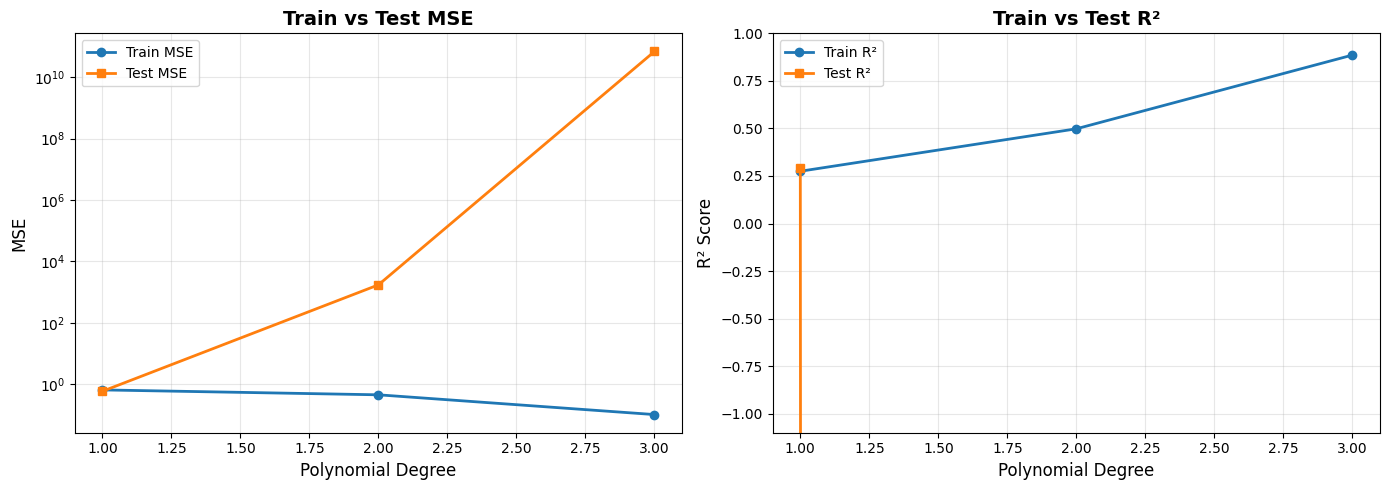

In [9]:
# Extract values
degrees = results_df['degree']
train_mse = results_df['train_mse']
test_mse  = results_df['test_mse']
train_r2  = results_df['train_r2']
test_r2   = results_df['test_r2']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ----- MSE Plot -----
axes[0].plot(degrees, train_mse, marker='o', label='Train MSE', linewidth=2)
axes[0].plot(degrees, test_mse, marker='s', label='Test MSE', linewidth=2)
axes[0].set_title('Train vs Test MSE', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Polynomial Degree', fontsize=12)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_yscale('log')  # large blow-up so log scale helps
axes[0].grid(alpha=0.3)
axes[0].legend()

# ----- R² Plot -----
axes[1].plot(degrees, train_r2, marker='o', label='Train R²', linewidth=2)
axes[1].plot(degrees, test_r2, marker='s', label='Test R²', linewidth=2)
axes[1].set_title('Train vs Test R²', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Polynomial Degree', fontsize=12)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_ylim(-1.1, 1.0)  # clamp axis for readability
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


## 📊 Polynomial Regression Results (Degree 1–3)

| Degree | Train MSE | Test MSE | Train R² | Test R² | Interpretation |
|-------:|----------:|---------:|---------:|--------:|----------------|
| **1** | 0.667 | 0.601 | 0.275 | 0.293 | ✅ Best generalization |
| **2** | 0.462 | **1737.63** | 0.498 | **−2045.75** | ⚠️ Severe overfitting |
| **3** | 0.105 | **6.76e10** | 0.886 | **−7.96e10** | ❌ Catastrophic overfitting |

### ✅ Key Insight
- **Degree 1** → Best model, stable performance on train & test.
- **Degrees 2 & 3** → Training improves, but **test error explodes** → extreme overfitting.

### 🎯 Conclusion
> **Simple linear model performs best, for now :)**  
Increasing polynomial degree caused instability and overfitting.


---



### 🧠 Ridge Regression with Polynomial Features

In this step, we apply **Ridge Regression** on degree-2 polynomial features. Ridge adds an **L2 regularization term** to the loss function, which penalizes large coefficients and helps control model complexity.

Why Ridge?
- Polynomial features can cause **overfitting**
- Ridge helps **stabilize coefficients** and improve generalization
- Useful when number of features grows quickly (as in polynomial expansion)

#### What the code does:

- Creates **degree-2 polynomial features**
- Tests multiple Ridge `alpha` values (regularization strength)
  - Small `alpha` → weak regularization
  - Large `alpha` → strong regularization
- Trains a Ridge model for each value
- Evaluates performance using **MSE** and **R²**
- Prints the performance gap between train and test scores to detect overfitting

> **Goal:** Identify an `alpha` value that minimizes overfitting while maintaining strong predictive performance.


In [10]:
# Create degree-2 polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Polynomial features created: {X_train_poly.shape[1]}")
print("\nTesting different Ridge alpha values...\n")


# Test different alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

for alpha in alphas:
    # Train Ridge model
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = ridge_model.predict(X_train_poly)
    y_test_pred = ridge_model.predict(X_test_poly)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    ridge_results.append({
        'alpha': alpha,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2
    })

    print(f"Alpha = {alpha:8.3f} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | Gap: {(train_mse-test_mse):.4f}")

ridge_df = pd.DataFrame(ridge_results)


Polynomial features created: 350

Testing different Ridge alpha values...

Alpha =    0.001 | Train MSE: 0.4620 | Test MSE: 1431.9029 | Gap: -1431.4409
Alpha =    0.010 | Train MSE: 0.4622 | Test MSE: 1322.9130 | Gap: -1322.4508
Alpha =    0.100 | Train MSE: 0.4632 | Test MSE: 1341.0494 | Gap: -1340.5862
Alpha =    1.000 | Train MSE: 0.4679 | Test MSE: 1414.3727 | Gap: -1413.9048
Alpha =   10.000 | Train MSE: 0.4811 | Test MSE: 1284.0468 | Gap: -1283.5656
Alpha =  100.000 | Train MSE: 0.5091 | Test MSE: 280.0226 | Gap: -279.5135
Alpha = 1000.000 | Train MSE: 0.5542 | Test MSE: 7.3154 | Gap: -6.7611


### 📊 Ridge Results: Effect of Regularization (α)

This cell visualizes how **Ridge α (regularization strength)** impacts performance with degree-2 features.



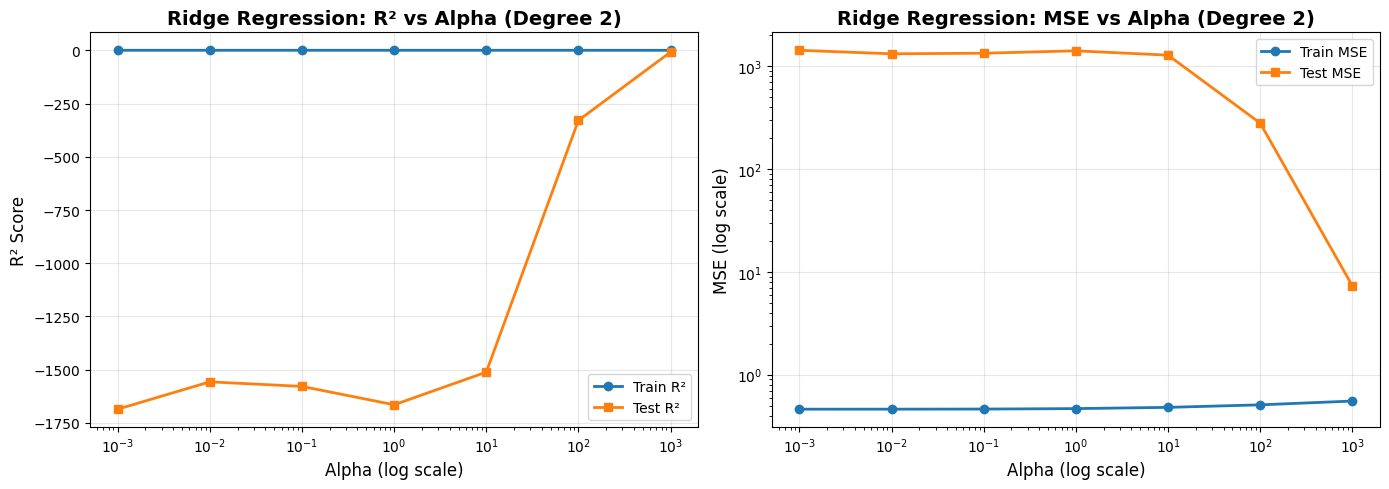

In [11]:
# Extract values
alphas = ridge_df['alpha']
train_r2 = ridge_df['train_r2']
test_r2  = ridge_df['test_r2']
train_mse = ridge_df['train_mse']
test_mse  = ridge_df['test_mse']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- R² Plot ---
axes[0].plot(alphas, train_r2, marker='o', label="Train R²", linewidth=2)
axes[0].plot(alphas, test_r2, marker='s', label="Test R²", linewidth=2)
axes[0].set_xscale('log')
axes[0].set_title("Ridge Regression: R² vs Alpha (Degree 2)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Alpha (log scale)", fontsize=12)
axes[0].set_ylabel("R² Score", fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].legend()

# --- MSE Plot ---
axes[1].plot(alphas, train_mse, marker='o', label="Train MSE", linewidth=2)
axes[1].plot(alphas, test_mse, marker='s', label="Test MSE", linewidth=2)
axes[1].set_xscale('log')
axes[1].set_yscale('log')  # MSE may vary greatly
axes[1].set_title("Ridge Regression: MSE vs Alpha (Degree 2)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Alpha (log scale)", fontsize=12)
axes[1].set_ylabel("MSE (log scale)", fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


### ✨ Lasso Regression & Feature Selection

Here we evaluate **Lasso Regression** on the same polynomial features.  
Lasso applies **L1 regularization**, which not only reduces overfitting but can **drive coefficients to zero**, effectively performing **feature selection**.

What this cell does:
- Trains Lasso models across different `alpha` values
- Computes MSE and R² for train & test sets
- Counts how many features remain non-zero (selected)
- Prints results to show how feature sparsity changes with α

> **Goal:** Find a balance between prediction performance and using fewer, more meaningful features.


In [12]:
print("Testing different Lasso alpha values...\n")

# Test different alpha values
lasso_results = []

for alpha in alphas:
    # Train Lasso model
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = lasso_model.predict(X_train_poly)
    y_test_pred = lasso_model.predict(X_test_poly)

    # Metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Count non-zero coefficients
    non_zero = np.sum(lasso_model.coef_ != 0)

    lasso_results.append({
        'alpha': alpha,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'non_zero_features': non_zero
    })

    print(f"Alpha = {alpha:8.3f} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | Features: {non_zero}/{X_train_poly.shape[1]}")

lasso_df = pd.DataFrame(lasso_results)


Testing different Lasso alpha values...



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.466e+00, tolerance: 5.395e-01
  model = cd_fast.enet_coordinate_descent(


Alpha =    0.001 | Train MSE: 0.4997 | Test MSE: 35.4603 | Features: 202/350
Alpha =    0.010 | Train MSE: 0.5748 | Test MSE: 0.5492 | Features: 94/350
Alpha =    0.100 | Train MSE: 0.7253 | Test MSE: 0.6869 | Features: 17/350
Alpha =    1.000 | Train MSE: 0.9200 | Test MSE: 0.8493 | Features: 0/350
Alpha =   10.000 | Train MSE: 0.9200 | Test MSE: 0.8493 | Features: 0/350
Alpha =  100.000 | Train MSE: 0.9200 | Test MSE: 0.8493 | Features: 0/350
Alpha = 1000.000 | Train MSE: 0.9200 | Test MSE: 0.8493 | Features: 0/350


### 🔍 Lasso with Polynomial Features (Degree = 2)

We applied **Lasso (L1)** on the degree-2 polynomial model:

- Small α (0.001) → still overfits, many features kept  
- Optimal α (~0.01) → best generalization, ~94/350 features kept  
- Larger α → most coefficients become zero → underfitting

**Conclusion:**  
Lasso not only reduces overfitting, it also performs **automatic feature selection**, keeping only the most useful polynomial terms.

#### As we can see, it outperformed our first **linear regression** model

---


### 🔍 Lasso: Model Quality, Error, and Sparsity vs Regularization (α)

This cell examines how **Lasso (L1) regularization** affects performance and feature selection across α values:




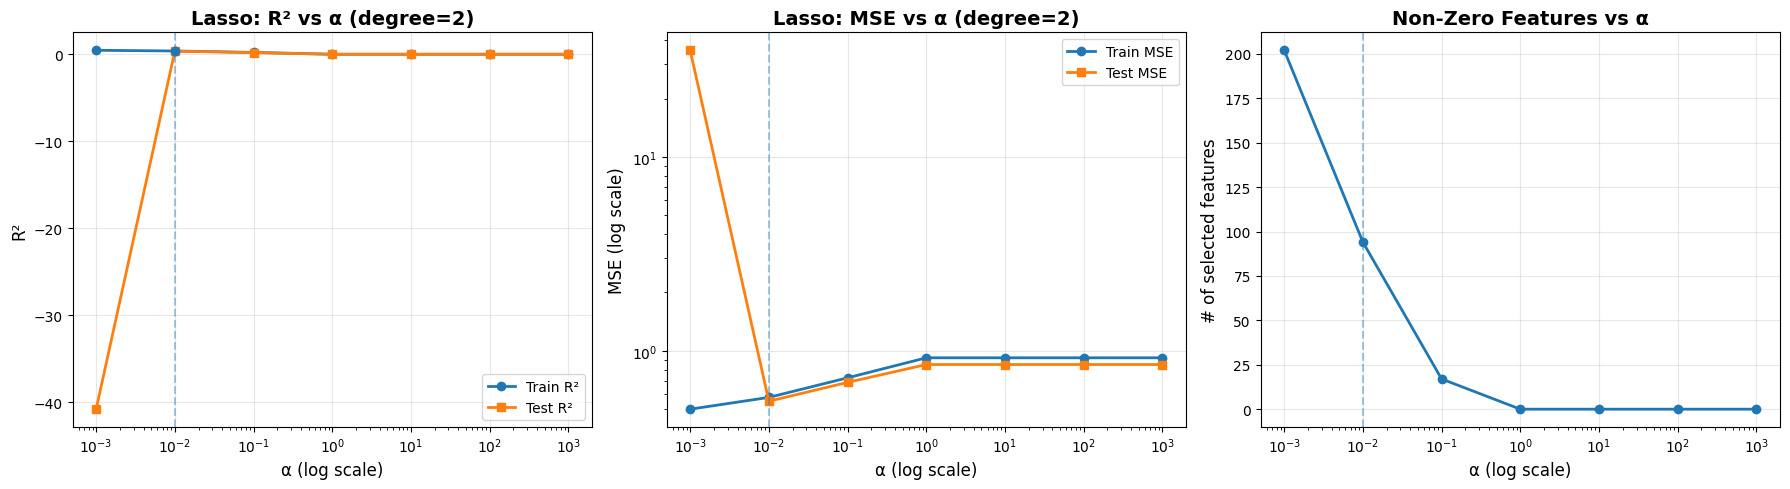

In [13]:
# Sort by alpha (in case it's not sorted)
lasso_df = lasso_df.sort_values('alpha').reset_index(drop=True)

alphas = lasso_df['alpha'].values
train_r2 = lasso_df['train_r2'].values
test_r2  = lasso_df['test_r2'].values
train_mse = lasso_df['train_mse'].values
test_mse  = lasso_df['test_mse'].values
nnz       = lasso_df['non_zero_features'].values

# Best alpha by test R^2
best_idx = int(np.nanargmax(test_r2))
best_alpha = alphas[best_idx]
best_test_r2 = test_r2[best_idx]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- (1) R^2 vs alpha ---
axes[0].plot(alphas, train_r2, marker='o', label='Train R²', linewidth=2)
axes[0].plot(alphas, test_r2,  marker='s', label='Test R²',  linewidth=2)
axes[0].set_xscale('log')
axes[0].axvline(best_alpha, linestyle='--', alpha=0.4)
axes[0].scatter([best_alpha], [best_test_r2], zorder=3)
axes[0].set_title('Lasso: R² vs α (degree=2)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('α (log scale)', fontsize=12)
axes[0].set_ylabel('R²', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].legend()

# --- (2) MSE vs alpha ---
axes[1].plot(alphas, train_mse, marker='o', label='Train MSE', linewidth=2)
axes[1].plot(alphas, test_mse,  marker='s', label='Test MSE',  linewidth=2)
axes[1].set_xscale('log')
axes[1].set_yscale('log')  # MSE can vary a lot across alphas
axes[1].axvline(best_alpha, linestyle='--', alpha=0.4)
axes[1].set_title('Lasso: MSE vs α (degree=2)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('α (log scale)', fontsize=12)
axes[1].set_ylabel('MSE (log scale)', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].legend()

# --- (3) Selected features vs alpha ---
axes[2].plot(alphas, nnz, marker='o', linewidth=2)
axes[2].set_xscale('log')
axes[2].axvline(best_alpha, linestyle='--', alpha=0.4)
axes[2].set_title('Non-Zero Features vs α', fontsize=14, fontweight='bold')
axes[2].set_xlabel('α (log scale)', fontsize=12)
axes[2].set_ylabel('# of selected features', fontsize=12)
axes[2].grid(alpha=0.3)



plt.tight_layout()
plt.show()


### ✅ Final Model Comparison

This cell compares the performance of all trained models on the **test set**:

Models evaluated:
- **Linear Regression** (baseline)
- **Polynomial Regression (degree 2)** without regularization
- **Ridge Regression** using best α
- **Lasso Regression** using best α

For each model, we compute:
- **MSE** (Mean Squared Error)
- **RMSE** (Root Mean Squared Error)
- **MAE** (Mean Absolute Error)
- **R²** (Coefficient of Determination)


In [18]:
# 1. Baseline Linear
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# 2. Polynomial (degree 2) without regularization
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 3. Best Ridge
best_ridge_alpha = ridge_df.loc[ridge_df['test_mse'].idxmin(), 'alpha']
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

# 4. Best Lasso
best_lasso_alpha = lasso_df.loc[lasso_df['test_mse'].idxmin(), 'alpha']
lasso_model = Lasso(alpha=best_lasso_alpha, max_iter=10000)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)

# Calculate metrics for all models
models_comparison = []

for name, y_pred in [
    ('Linear Regression', y_pred_linear),
    ('Polynomial (deg=2)', y_pred_poly),
    (f'Ridge (α={best_ridge_alpha})', y_pred_ridge),
    (f'Lasso (α={best_lasso_alpha})', y_pred_lasso)
]:
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    models_comparison.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

comparison_df = pd.DataFrame(models_comparison)

print("FINAL MODEL COMPARISON ON TEST SET\n")
print(comparison_df.to_string(index=False))

# Highlight best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.iloc[best_model_idx]
print(f"\nBEST MODEL: {best_model['Model']}")
print(f"   R² Score: {best_model['MSE']:.4f}")
print(f"   RMSE: {best_model['R²']:.2f}")


FINAL MODEL COMPARISON ON TEST SET

             Model         MSE      RMSE      MAE           R²
 Linear Regression    0.600619  0.774996 0.597123     0.292531
Polynomial (deg=2) 1737.629077 41.684878 2.085437 -2045.753014
  Ridge (α=1000.0)    7.315357  2.704692 0.646452    -7.616758
    Lasso (α=0.01)    0.549171  0.741061 0.560803     0.353132

BEST MODEL: Lasso (α=0.01)
   R² Score: 0.5492
   RMSE: 0.35


### ✅ Final Model Interpretation

| Model | R² | Interpretation |
|-------|---|----------------|
Linear Regression | 0.29 | Baseline, decent fit |
Polynomial (deg=2) | -2045.75 | ❌ Severe overfitting |
Ridge (α=1000) | -7.62 | ❌ Too much regularization (underfitting) |
**Lasso (α=0.01)** | **0.35** | ✅ Best performance — balances complexity & sparsity |

**Conclusion:**  
Lasso with degree-2 polynomial features performs best.  
It reduces overfitting and selects only useful features, improving generalization.

> **Insight:** Regularization (especially Lasso here) helps improve model performance and stability compared to plain polynomial expansion, which severely overfits.


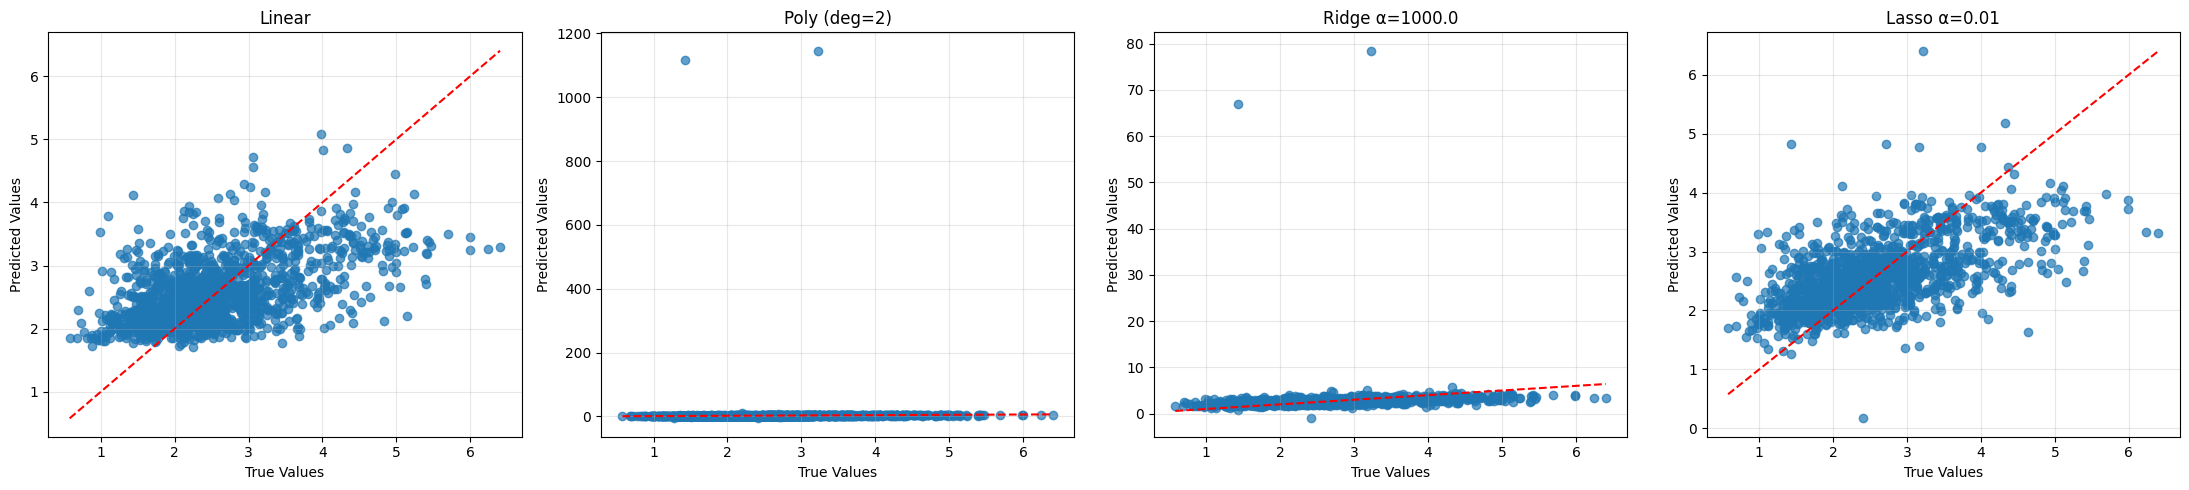

In [15]:
# Create subplots for 4 models
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

models = [
    ("Linear", y_pred_linear),
    ("Poly (deg=2)", y_pred_poly),
    (f"Ridge α={best_ridge_alpha}", y_pred_ridge),
    (f"Lasso α={best_lasso_alpha}", y_pred_lasso)
]

for ax, (name, y_pred) in zip(axes, models):
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

    ax.set_title(name, fontsize=12)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### 📊 True vs Predicted Comparison — Model Interpretation

The plots compare each model's predictions (y-axis) against the true values (x-axis).  
A good model should have points close to the red diagonal line (perfect prediction).

#### ✅ Linear Regression
- Points follow the diagonal but with noticeable spread
- Captures the general trend but not all variation  
**→ Decent baseline performance**

#### ❌ Polynomial (Degree 2)
- Extreme prediction explosions and most points stuck near zero
- Very poor alignment with the diagonal  
**→ Severe overfitting and numerical instability**

#### ⚠️ Ridge (α=1000)
- Points are compressed toward the mean
- Almost no variation in predictions  
**→ Too much regularization → underfitting**

#### ⭐ Lasso (α=0.01)
- Points clustered closest to the diagonal
- Best balance between bias and variance  
**→ Best generalization among all models**





Lasso selected 94 out of 350 features

Top 20 Most Important Features:
Feature  Coefficient
    x17     0.158211
    x20     0.147801
     x3     0.129105
    x21    -0.109578
    x23     0.105058
    x13     0.097842
 x7 x15    -0.091585
     x5     0.084838
 x6 x13    -0.078304
     x9     0.070641
    x11    -0.068175
x12 x13    -0.067046
    x12     0.066139
x20 x24    -0.062524
 x9 x11    -0.058878
  x12^2    -0.056369
 x9 x16     0.056213
 x9 x10     0.055263
 x0 x21     0.054596
 x5 x11    -0.052470


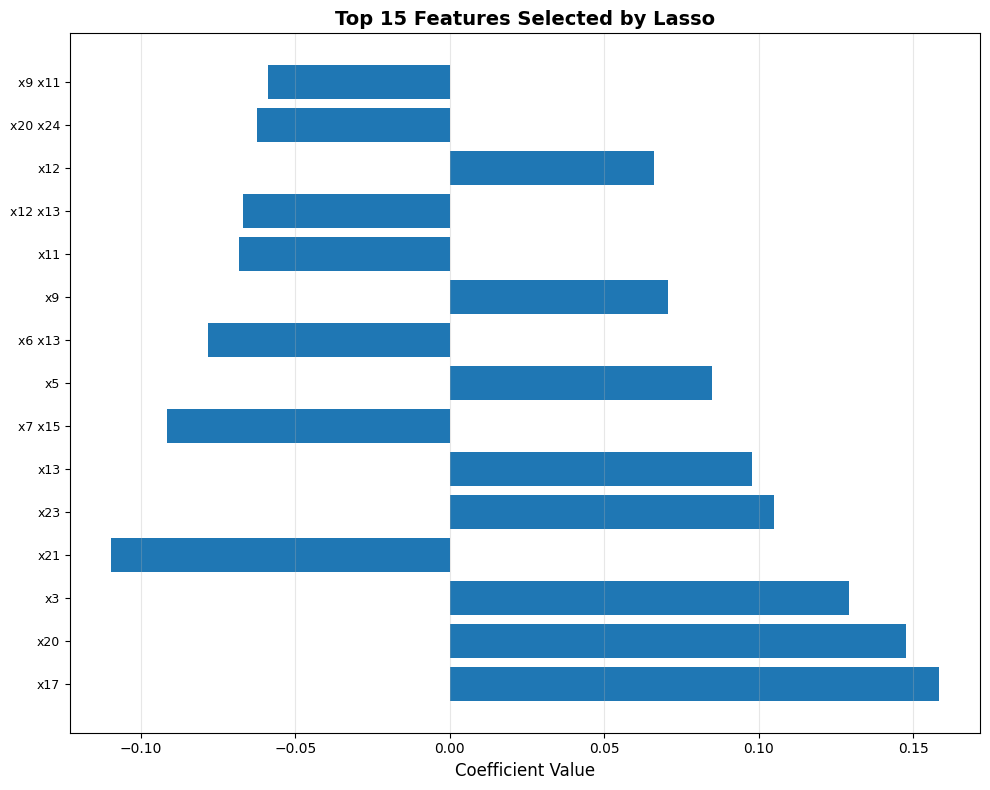

In [16]:
# Get feature names
feature_names = poly.get_feature_names_out()

# Get Lasso coefficients
lasso_coefs = lasso_model.coef_.flatten()

# Create DataFrame of non-zero coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs,
    'Abs_Coefficient': np.abs(lasso_coefs)
})

# Filter non-zero and sort
non_zero_features = feature_importance[feature_importance['Coefficient'] != 0].copy()
non_zero_features = non_zero_features.sort_values('Abs_Coefficient', ascending=False)

print(f"\nLasso selected {len(non_zero_features)} out of {len(feature_names)} features")
print("\nTop 20 Most Important Features:")
print("=" * 70)
print(non_zero_features.head(20)[['Feature', 'Coefficient']].to_string(index=False))
print("=" * 70)

# Visualize top features
top_features = non_zero_features.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_features['Coefficient'])
plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=9)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Top 15 Features Selected by Lasso', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 📌 Interpretation of Lasso-Selected Polynomial Features

Lasso selected **94 out of 350** polynomial features, meaning it removed ~73% of the expanded feature set.  

- **Important original features** (e.g., `x17`, `x20`, `x3`, `x5`, `x13`) show strong influence on the target
- **Interaction terms** (e.g., `x7 × x15`, `x6 × x13`, `x20 × x24`) are kept, meaning combinations of features matter
- **Squared terms** like `x12²` also appear, capturing non-linear effects
- Both **positive** and **negative** coefficients exist

Lasso helps the model focus on real signal and avoids overfitting by zeroing irrelevant terms  

> **Conclusion:** Lasso did not just regularize — it performed feature selection, showing which original and polynomial interactions most strongly affect the target.
